healpix orders: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
num partitions: 1792
total rows: 542485883
------
min rows: 1
max rows: 999590
object ratio: 999590.0


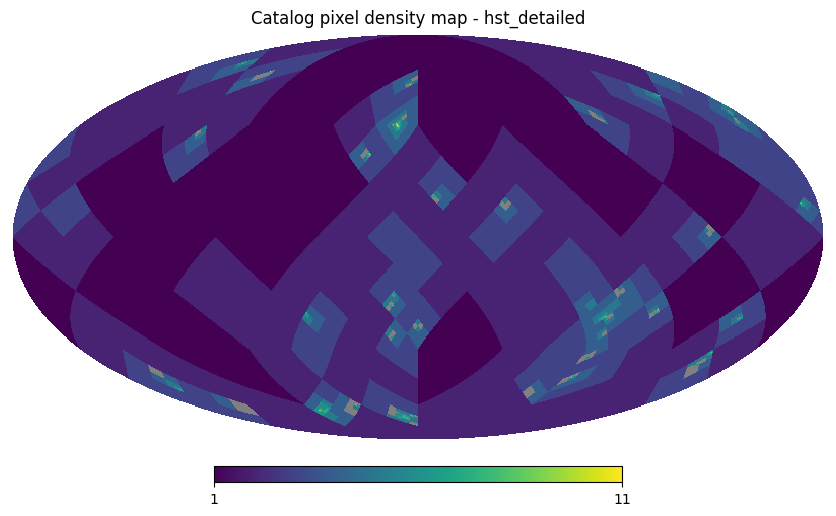

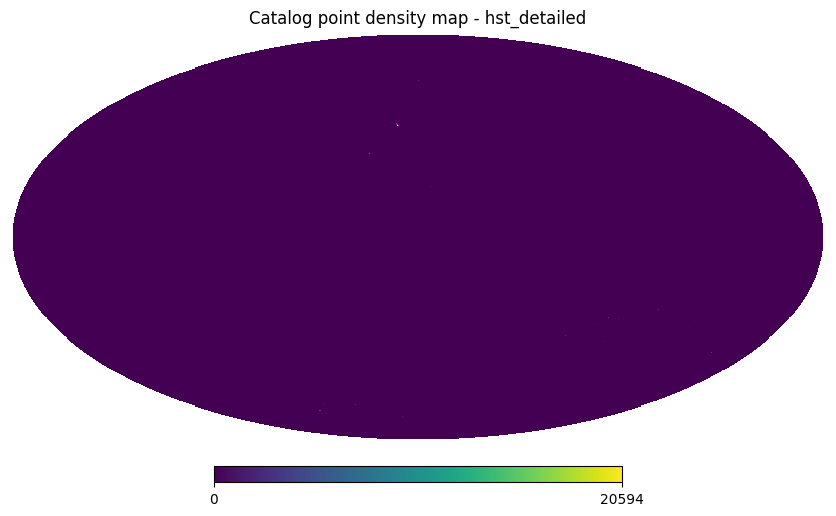

In [15]:
import os
from hipscat.catalog import Catalog
from hipscat.inspection import visualize_catalog

hipscat_dir="/data3/epyc/data3/hipscat/catalogs/hst/hst_detailed"
cat = Catalog(hipscat_dir)
visualize_catalog.plot_pixels(cat)
visualize_catalog.plot_points(cat)

partition_data = cat.get_pixels()

print(f'healpix orders: {partition_data["Norder"].unique()}')
print(f'num partitions: {len(partition_data["Npix"])}')
print(f'total rows: {partition_data["num_objects"].sum()}')
print('------')
print(f'min rows: {partition_data["num_objects"].min()}')
print(f'max rows: {partition_data["num_objects"].max()}')
print(f'object ratio: {partition_data["num_objects"].max()/partition_data["num_objects"].min()}')



# partition_data["size_on_disk"] = 0

# for index, partition in partition_data.iterrows():
#     file_name = os.path.join(
#         hipscat_dir,
#         f"Norder={int(partition['Norder'])}",
#         f"Dir={int(partition['Dir'])}",        
#         f"Npix={int(partition['Npix'])}.parquet",
#     )
#     partition_data.loc[index, "size_on_disk"] = os.path.getsize(file_name)
# partition_data = partition_data.astype(int)
# partition_info = "/astro/users/mmd11/catalogs/hst_more_partition_info.csv"
# partition_data.to_csv(partition_info, index=False)